Exercise 3 (p.332, Chap.8), 5 (p.332, Chap.8), 8 (p.333, Chap.8), 9 (p.334, Chap.8) and 10 (p.334, Chap.8)

Exercise 3 (p.332, Chap.8)

In [15]:
p=seq(0,1,0.01)

In [16]:
g=p*(1-p)*2

In [17]:
e=-(p*log(p)+(1-p)*log(1-p))

In [18]:
class.err=1-pmax(p,1-p)

In [21]:
y = cbind(g,e,class.err)

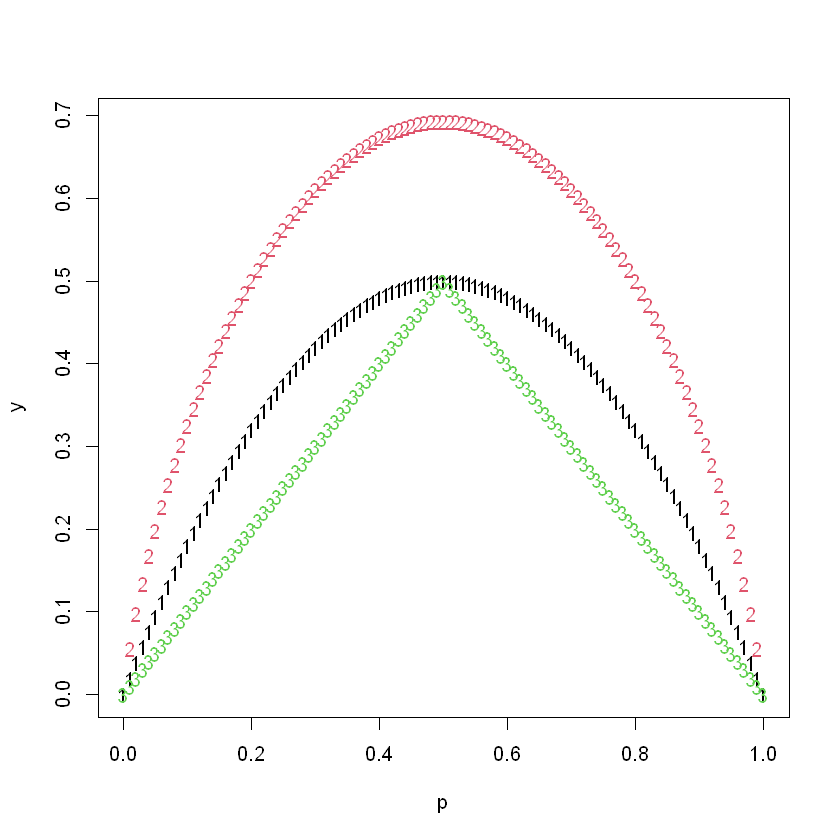

In [22]:
matplot(p,y)

Exercise 5 (p.332, Chap.8)

In [27]:
sample = c(0.1,0.15,0.2,0.2,0.55,0.6,0.6,0.65,0.7,0.75)

In [30]:
#Majority

sum(sample > 0.5)> sum(sample < 0.5)

[1] TRUE

this means that the RED is the final prediction with this approach

In [31]:
#Average

mean(sample)

[1] 0.45

this means that the GREEN is the final prediction with this approach

Exercise 8 (p.333, Chap.8)

In [82]:
library(ISLR)
library(tree)
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [67]:
set.seed(42)
train = sample(dim(Carseats)[1], dim(Carseats)[1]/2)
Carseats.train = Carseats[train, ]
Carseats.test = Carseats[-train, ]

In [68]:
tree.Carseats = tree(Sales ~ ., data = Carseats.train)
summary(tree.Carseats)


Regression tree:
tree(formula = Sales ~ ., data = Carseats.train)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Age"         "Income"      "Advertising"
[6] "CompPrice"   "Population"  "Urban"      
Number of terminal nodes:  18 
Residual mean deviance:  2.266 = 412.4 / 182 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.46100 -1.01400 -0.09829  0.00000  1.06900  3.68600 

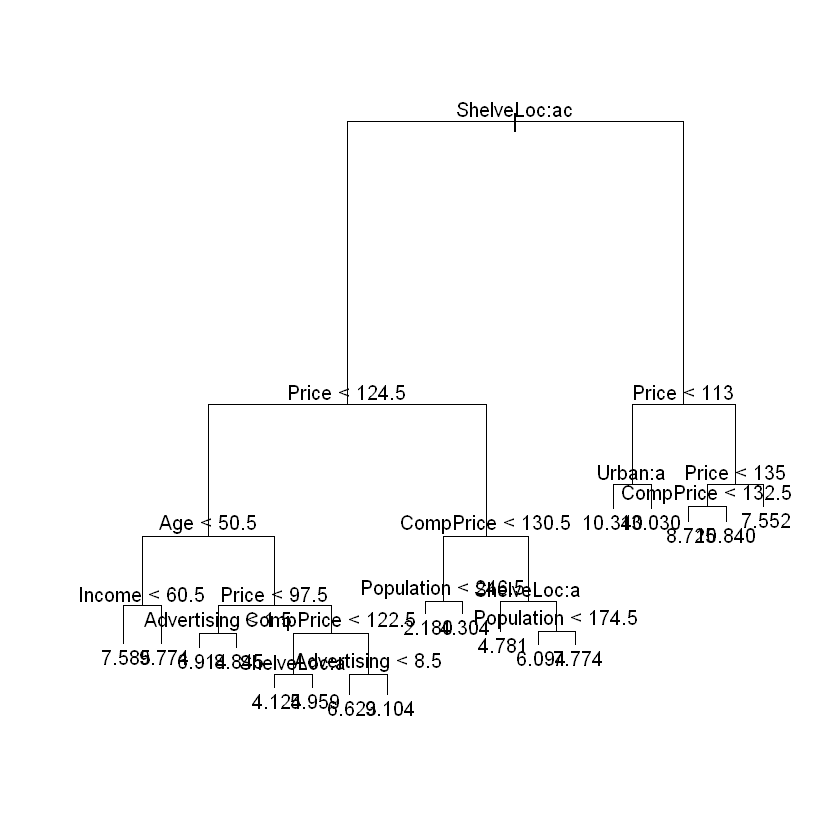

In [69]:
plot(tree.Carseats)
text(tree.Carseats)

In [70]:
pred.Carseats = predict(tree.Carseats,Carseats.test)
MSE = mean((Carseats.test$Sales - pred.Carseats)^2)
print(paste0("MSE:",MSE))

[1] "MSE:5.68640105173353"


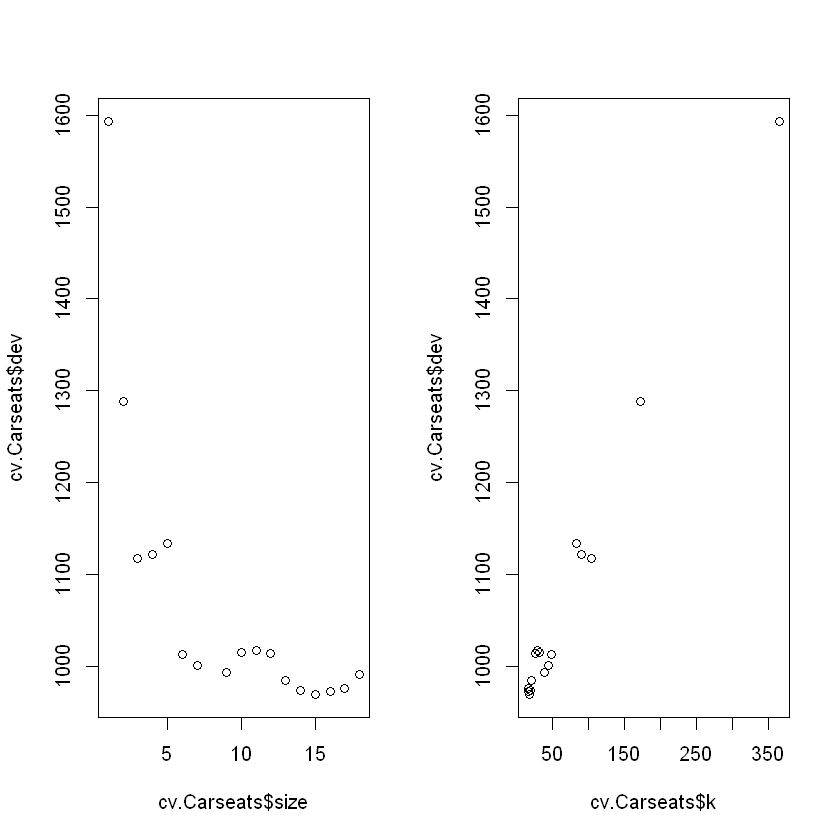

In [71]:
cv.Carseats = cv.tree(tree.Carseats, FUN = prune.tree)
par(mfrow = c(1, 2))
plot(cv.Carseats$size, cv.Carseats$dev)
plot(cv.Carseats$k, cv.Carseats$dev,)

In [83]:
b = 15

Warning message in prune.tree(tree.carseats, best = 15):
"best is bigger than tree size"


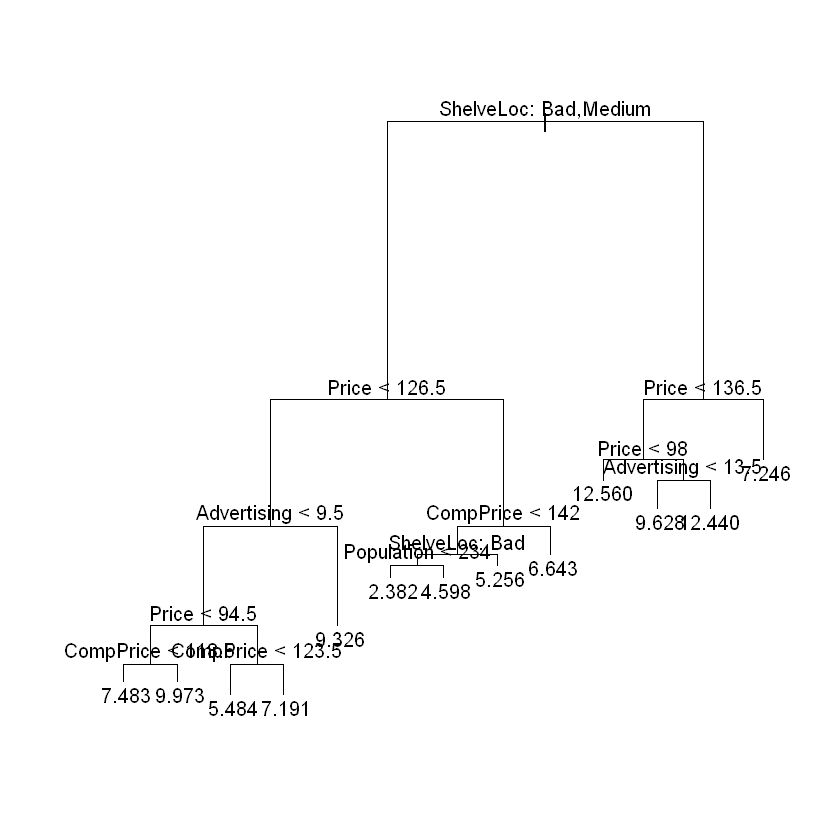

In [84]:
pruned.carseats = prune.tree(tree.carseats, best = 15)
par(mfrow = c(1, 1))
plot(pruned.carseats)
text(pruned.carseats, pretty = 0)

In [85]:
pred.pruned = predict(pruned.carseats, Carseats.test)
print(mean((Carseats.test$Sales - pred.pruned)^2))
MSEimprove = MSE - mean((Carseats.test$Sales - pred.pruned)^2)
print(paste0("the MSE has been improved by: ", round(MSEimprove,2)," after pruning"))

[1] 4.127063
[1] "the MSE has been improved by: 1.56 after pruning"


In [90]:
bag.carseats = randomForest(Sales ~ ., data = Carseats.train, mtry = 10, ntree = 500,importance = T)
bag.pred = predict(bag.carseats, Carseats.test)
MSEbag = mean((Carseats.test$Sales - bag.pred)^2)
MSEbag

[1] 2.346064

In [89]:
importance(bag.carseats)

,%IncMSE,IncNodePurity
CompPrice,29.9606075,195.723358
Income,10.9806710,104.761801
Advertising,14.8277172,110.499056
Population,2.7829751,61.123799
Price,55.4654823,436.338579
ShelveLoc,59.3912167,422.818971
Age,13.1432048,136.350694
Education,-1.2691202,43.758223
Urban,3.0692131,9.145507
US,0.7668856,6.346066


In [101]:
print(paste0("Prince and Shelveloc are the most important predictors for the sales."))
print(paste0("We can also see that thanks to bagging the MSE is now: ",MSEbag))

[1] "Prince and Shelveloc are the most important predictors for the sales."
[1] "We can also see that thanks to bagging the MSE is now: 2.34606374362306"


In [113]:
rf.carseats = randomForest(Sales ~ ., data = Carseats.train, mtry = 10, ntree = 500, 
    importance = T)
rf.pred = predict(rf.carseats, Carseats.test)
MSErf1 = mean((Carseats.test$Sales - rf.pred)^2)
MSErf1

[1] 2.353071

In [114]:
rf.carseats = randomForest(Sales ~ ., data = Carseats.train, mtry = 5, ntree = 500, 
    importance = T)
rf.pred = predict(rf.carseats, Carseats.test)
MSErf2 = mean((Carseats.test$Sales - rf.pred)^2)
MSErf2

[1] 2.456337

In [106]:
importance(rf.carseats)

,%IncMSE,IncNodePurity
CompPrice,31.6268274,201.015060
Income,10.3528311,99.810695
Advertising,14.0370207,112.995777
Population,2.0775728,64.538551
Price,53.7498558,440.405029
ShelveLoc,54.2569905,421.265608
Age,10.9154149,141.129557
Education,-0.8112582,42.732872
Urban,1.8672138,9.717216
US,-0.5696907,5.576923


In [115]:
print("We can see that changing M makes the MSE higher")

[1] "We can see that changing M makes the MSE higher"


Exercice 9 (p.334, Chap.8)

In [117]:
set.seed(42)

train = sample(dim(OJ)[1], 800)
OJ.train = OJ[train, ]
OJ.test = OJ[-train, ]

In [118]:
oj.tree = tree(Purchase ~ ., data = OJ.train)
summary(oj.tree)


Classification tree:
tree(formula = Purchase ~ ., data = OJ.train)
Variables actually used in tree construction:
[1] "LoyalCH"     "SalePriceMM" "PriceDiff"  
Number of terminal nodes:  8 
Residual mean deviance:  0.7392 = 585.5 / 792 
Misclassification error rate: 0.1638 = 131 / 800 

In [119]:
print("8 terminal nodes and uses the variables LoyalCH, SalePriceMM & PriceDiff")

[1] "8 terminal nodes and uses the variables LoyalCH, SalePriceMM & PriceDiff"


In [120]:
oj.tree

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1066.00 CH ( 0.61500 0.38500 )  
   2) LoyalCH < 0.48285 285  296.00 MM ( 0.21404 0.78596 )  
     4) LoyalCH < 0.064156 64    0.00 MM ( 0.00000 1.00000 ) *
     5) LoyalCH > 0.064156 221  260.40 MM ( 0.27602 0.72398 )  
      10) SalePriceMM < 2.04 128  123.50 MM ( 0.18750 0.81250 ) *
      11) SalePriceMM > 2.04 93  125.00 MM ( 0.39785 0.60215 ) *
   3) LoyalCH > 0.48285 515  458.10 CH ( 0.83689 0.16311 )  
     6) LoyalCH < 0.753545 230  282.70 CH ( 0.69565 0.30435 )  
      12) PriceDiff < 0.265 149  203.00 CH ( 0.57718 0.42282 )  
        24) PriceDiff < -0.165 32   38.02 MM ( 0.28125 0.71875 ) *
        25) PriceDiff > -0.165 117  150.30 CH ( 0.65812 0.34188 )  
          50) LoyalCH < 0.703993 105  139.60 CH ( 0.61905 0.38095 ) *
          51) LoyalCH > 0.703993 12    0.00 CH ( 1.00000 0.00000 ) *
      13) PriceDiff > 0.265 81   47.66 CH ( 0.91358 0.08642 ) *
     7) LoyalCH > 0.753545 285  111

For node 7 the split variable is LoyalCH. The value splits at 0.75.

There are 285 points in the subtree below this point

The probability for this node  that Sales = CH is 0.95 and that Sales = MM is 0.05

The * shows this is a terminal node

In [121]:
oj.pred = predict(oj.tree, OJ.test, type = "class")
table(OJ.test$Purchase, oj.pred)

    oj.pred
      CH  MM
  CH 125  36
  MM  15  94

In [123]:
cv.oj = cv.tree(oj.tree, FUN = prune.tree)

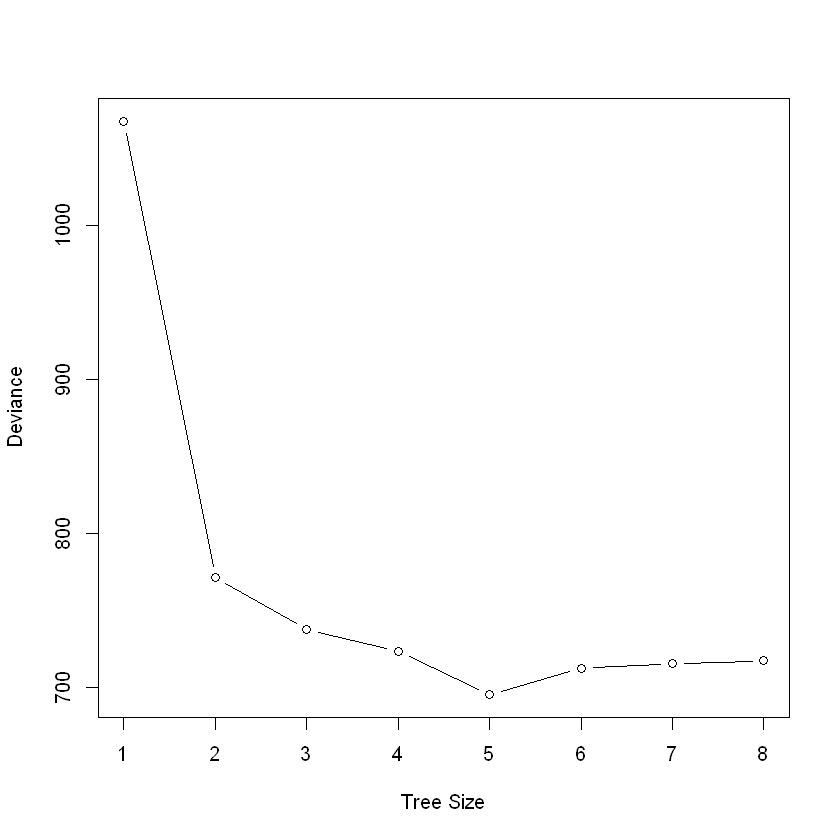

In [124]:
plot(cv.oj$size, cv.oj$dev, type = "b", xlab = "Tree Size", ylab = "Deviance")

Size of 6 gives lowest cross-validation error.

In [126]:
oj.pruned = prune.tree(oj.tree, best = 6)

In [127]:
summary(oj.pruned)


Classification tree:
snip.tree(tree = oj.tree, nodes = c(25L, 5L))
Variables actually used in tree construction:
[1] "LoyalCH"   "PriceDiff"
Number of terminal nodes:  6 
Residual mean deviance:  0.7658 = 608.1 / 794 
Misclassification error rate: 0.1638 = 131 / 800 

it is exactly the same (0.1638)